# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [26]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
sheet = 'study_results'

In [27]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/covariates_and_acoe_socre/age_interact_status'

In [28]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,Name,Measurement,Cohort,Educational_Status,Randomization_Group,Age,Sex,Ethnicity,Cognitive_Status,Cognitive_Status_Code,...,Subjective_Complaint,Attention_Complaint,Memory_Complaint,Fluency_Complaint,Language_Complaint,Visuospatial_Complaint,Impaired_on_ACE3,iADL_Impaired,ADL_Impaired,Adjusted_Total
0,NaN,patient_15,1,1.0,1.0,42,0.0,1.0,MCI,0,...,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None,72.64
1,NaN,patient_17,1,1.0,1.0,35,1.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,73.10
2,NaN,patient_19,1,1.0,1.0,71,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,89.02
3,NaN,patient_25,1,1.0,1.0,53,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None,74.06
4,NaN,patient_26,1,2.0,1.0,49,0.0,0.0,MCI,0,...,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None,83.18
5,NaN,patient_40,1,1.0,1.0,51,1.0,0.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,96.62
6,NaN,patient_42,1,1.0,1.0,46,1.0,1.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,92.52
7,NaN,patient_47,1,1.0,1.0,37,1.0,1.0,MCI,0,...,No,NaN,NaN,NaN,NaN,NaN,No,None,None,87.54
8,NaN,patient_108,2,1.0,1.0,35,0.0,0.0,intact,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.10
9,NaN,patient_109,2,3.0,1.0,41,0.0,0.0,MCI,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.42


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [29]:
data_df.columns

Index(['Name', 'Measurement', 'Cohort', 'Educational_Status',
       'Randomization_Group', 'Age', 'Sex', 'Ethnicity', 'Cognitive_Status',
       'Cognitive_Status_Code', 'Question_1', 'Question_3', 'Question_4',
       'Question_5', 'Question_6', 'Question_7', 'Question_8', 'Question_9',
       'Question_10', 'Question_11', 'Question_12', 'Question_13',
       'Question_14', 'Question_15', 'Question_16', 'Question_17',
       'Question_18', 'Question_19', 'Question_20', 'Total', 'Attention',
       'Memory', 'Fluency', 'Language', 'Visuospatial', 'POCA',
       'Convolutional_Neural_Network', 'Natural_Language_Processing',
       'Expert_Algorithm', 'Completed', 'ACE3_Question_2', 'ACE3_Question_3',
       'ACE3_Question_4', 'ACE3_Question_5', 'ACE3_Question_6',
       'ACE3_Question_7', 'ACE3_Question_8', 'ACE3_Question_9',
       'ACE3_Question_10', 'ACE3_Question_11', 'ACE3_Question_12',
       'ACE3_Question_13', 'ACE3_Question_14', 'ACE3_Question_15',
       'ACE3_Question_16', '

In [30]:
drop_list = ['Randomization_Group']

In [31]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Name,Measurement,Cohort,Educational_Status,Randomization_Group,Age,Sex,Ethnicity,Cognitive_Status,Cognitive_Status_Code,...,Subjective_Complaint,Attention_Complaint,Memory_Complaint,Fluency_Complaint,Language_Complaint,Visuospatial_Complaint,Impaired_on_ACE3,iADL_Impaired,ADL_Impaired,Adjusted_Total
0,NaN,patient_15,1,1.0,1.0,42,0.0,1.0,MCI,0,...,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None,72.64
1,NaN,patient_17,1,1.0,1.0,35,1.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,73.10
2,NaN,patient_19,1,1.0,1.0,71,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None,89.02
3,NaN,patient_25,1,1.0,1.0,53,0.0,1.0,MCI,0,...,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None,74.06
4,NaN,patient_26,1,2.0,1.0,49,0.0,0.0,MCI,0,...,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None,83.18
5,NaN,patient_40,1,1.0,1.0,51,1.0,0.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,96.62
6,NaN,patient_42,1,1.0,1.0,46,1.0,1.0,intact,1,...,Yes,NaN,Yes,NaN,Yes,NaN,No,None,None,92.52
7,NaN,patient_47,1,1.0,1.0,37,1.0,1.0,MCI,0,...,No,NaN,NaN,NaN,NaN,NaN,No,None,None,87.54
8,NaN,patient_108,2,1.0,1.0,35,0.0,0.0,intact,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.10
9,NaN,patient_109,2,3.0,1.0,41,0.0,0.0,MCI,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.42


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below')
value = 3  # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Descriptive Stats

In [ ]:
data_df.describe()

# 02 - Cohen's Kappa

In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

def calculate_cohens_kappa_by_category(df: pd.DataFrame, column_mapping: dict) -> dict:
    """
    Calculate Cohen's Kappa score for specified pairs of columns in two pandas DataFrames.
    This function is useful for evaluating agreement on a category-by-category basis.

    Args:
        df (pd.DataFrame): The first DataFrame with ratings by the first rater.
        column_mapping (dict): A dictionary mapping columns in df to corresponding columns in df.

    Returns:
        dict: A dictionary with column names from df1 as keys and their corresponding Cohen's Kappa
              scores as values.

    Raises:
        ValueError: If any specified column does not exist in its respective DataFrame.
    """

    kappa_scores = {}
    for k, v in column_mapping.items():
        # Check if columns exist in their respective DataFrames
        if k not in df.columns or v not in df.columns:
            raise ValueError(f"Column '{k}' or '{v}' does not exist in the DataFrame.")

        # Calculate Cohen's Kappa for the column pair and add to the result dictionary
        kappa_scores[k] = cohen_kappa_score(df[k], df[v])

    return kappa_scores

In [ ]:
data_df.columns

Dictionary Mapping Columns to be Kappa'd

In [ ]:
dict = {'frontal': 'frontal_eh', 
        'temporal':  'temporal_eh', 
        'parietal': 'parietal_eh',
        'occipital': 'occipital_eh',
        'cerebellum': 'cerebellum_eh',
       'mesial_temporal': 'mesial_temporal_eh',
       'ventricle': 'ventricle_eh'
}

In [ ]:
calculate_cohens_kappa_by_category(data_df, dict)

# Intraclass Correlation Coefficient

ICC1 (Single raters absolute):
- Use-Case: Assess the agreement or reliability of ratings provided by a single rater on the same items over multiple trials or observations.
Example: Evaluating how consistent a single medical doctor's diagnoses are for the same set of patients over time.

ICC2 (Single random raters):
- Use-Case: Assess the agreement among multiple raters when raters are randomly selected or if you want to account for random variation among raters.
Example: Evaluating the agreement among different teachers when grading the same set of student assignments, with teachers selected randomly.

ICC3 (Single fixed raters):
- Use-Case: Assess the agreement among multiple raters when raters are fixed or predetermined. Assumes that the same raters provide ratings across all observations.
Example: Evaluating the agreement among expert judges who consistently rate the same set of artworks.

ICC1k (Average raters absolute):
- Use-Case: Assess the agreement or reliability of the average ratings across multiple raters for the same items over multiple trials or observations.
Example: Evaluating how consistent the average ratings of a panel of judges are when rating the same set of food dishes for a cooking competition.

ICC2k (Average random raters):
- Use-Case: Assess the agreement among average ratings provided by multiple raters when raters are randomly selected. Accounts for random variation among raters.
Example: Evaluating the agreement among the average scores given by randomly selected sports referees for the same game.

ICC3k (Average fixed raters):
- Use-Case: Assess the agreement among average ratings provided by multiple raters when raters are fixed or predetermined. Assumes the same raters provide average ratings consistently.
Example: Evaluating the agreement among the average scores given by a fixed panel of judges for multiple rounds of a talent competition.

In [8]:
import pandas as pd
import numpy as np
import pingouin as pg

def calculate_icc(df: pd.DataFrame, column_mapping: dict) -> dict:
    
    icc_scores = {}
    for k, v in column_mapping.items():
    # Combine the series into a DataFrame
        series1 = df[k]
        series2 = df[v]
    
        icc_df = series1.to_frame(name='rating1')
        icc_df['rating2'] = series2

        # Melt the DataFrame to long format
        df_melted = icc_df.melt(value_vars=['rating1', 'rating2'], var_name='rater', value_name='rating')
        # Add a subject column
        df_melted['subject'] = df_melted.groupby('rater').cumcount()
        # Calculate ICC
        icc_result = pg.intraclass_corr(data=df_melted, targets='subject', raters='rater', ratings='rating')
        icc_scores[k] = icc_result
    return icc_scores

In [36]:
data_df.columns

Index(['Name', 'Measurement', 'Cohort', 'Educational_Status',
       'Randomization_Group', 'Age', 'Sex', 'Ethnicity', 'Cognitive_Status',
       'Cognitive_Status_Code', 'Question_1', 'Question_3', 'Question_4',
       'Question_5', 'Question_6', 'Question_7', 'Question_8', 'Question_9',
       'Question_10', 'Question_11', 'Question_12', 'Question_13',
       'Question_14', 'Question_15', 'Question_16', 'Question_17',
       'Question_18', 'Question_19', 'Question_20', 'Total', 'Attention',
       'Memory', 'Fluency', 'Language', 'Visuospatial', 'POCA',
       'Convolutional_Neural_Network', 'Natural_Language_Processing',
       'Expert_Algorithm', 'Completed', 'ACE3_Question_2', 'ACE3_Question_3',
       'ACE3_Question_4', 'ACE3_Question_5', 'ACE3_Question_6',
       'ACE3_Question_7', 'ACE3_Question_8', 'ACE3_Question_9',
       'ACE3_Question_10', 'ACE3_Question_11', 'ACE3_Question_12',
       'ACE3_Question_13', 'ACE3_Question_14', 'ACE3_Question_15',
       'ACE3_Question_16', '

Dict Mapping Columns to Be ICC'd

In [39]:
dict = {'Adjusted_Total': 'ACE_Total'}

In [40]:
icc = calculate_icc(data_df, dict)
icc

{'Adjusted_Total':     Type              Description       ICC         F  df1  df2          pval  \
 0   ICC1   Single raters absolute  0.788976  8.477608   34   35  3.649764e-09   
 1   ICC2     Single random raters  0.789493  8.679360   34   34  3.946178e-09   
 2   ICC3      Single fixed raters  0.793375  8.679360   34   34  3.946178e-09   
 3  ICC1k  Average raters absolute  0.882042  8.477608   34   35  3.649764e-09   
 4  ICC2k    Average random raters  0.882365  8.679360   34   34  3.946178e-09   
 5  ICC3k     Average fixed raters  0.884784  8.679360   34   34  3.946178e-09   
 
           CI95%  
 0  [0.62, 0.89]  
 1  [0.62, 0.89]  
 2  [0.63, 0.89]  
 3  [0.77, 0.94]  
 4  [0.77, 0.94]  
 5  [0.77, 0.94]  }

Plot a Bunch of ICCs

In [32]:
import os
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from pingouin import intraclass_corr
import matplotlib.patches as mpatches
from calvin_utils.statistical_utils.distribution_statistics import BootstrappedDistributionStatistics
from calvin_utils.statistical_utils.resampling_functions import Bootstrap

class ICCForest():
    def __init__(self, dataframe, comparisons_dict, ICC_Method='ICC1', out_dir=None, full_legend_patches=False, palette="tab10"):
        self.ICC_Method = ICC_Method
        self.comparisons_dict = comparisons_dict
        self.df = dataframe
        self.out_dir = out_dir
        self.full_legend_patches=full_legend_patches
        self.palette = palette

    def calculate_icc(self, col1, col2):
        # Select only the specified columns and rename them for compatibility with pingouin
        data = self.df[[col1, col2]].rename(columns={col1: 'rating1', col2: 'rating2'})

        # Reshape data for pingouin's intraclass_corr function
        df_melted = data.melt(value_vars=['rating1', 'rating2'], var_name='rater', value_name='rating')
        df_melted['subject'] = df_melted.groupby('rater').cumcount()

        # Calculate ICC
        icc_result = intraclass_corr(data=df_melted, targets='subject', raters='rater', ratings='rating')
        
        # Return ICC, 95CI[lower, upper], p-value
        return icc_result.set_index('Type').loc[self.ICC_Method, 'ICC'], icc_result.set_index('Type').loc[self.ICC_Method, 'CI95%'], icc_result.set_index('Type').loc[self.ICC_Method, 'pval']
    
    def save_icc_forest(self, icc_forest):
        os.makedirs(os.path.join(self.out_dir, 'icc_figures'), exist_ok=True)
        icc_forest.savefig(os.path.join(self.out_dir, 'icc_figures/icc_multipl_comparison_barplot.png'))
        icc_forest.savefig(os.path.join(self.out_dir, 'icc_figures/icc_multipl_comparison_barplot_barplot.svg'))
        print('Figure saved to: ', (os.path.join(self.out_dir, 'icc_figures/icc_multipl_comparison_barplot')))
    
    def plot_icc_forest(self):
        if len(self.comparisons_dict) < 3:
             figure = plt.figure(figsize=(6,3))
        else:
            figure = plt.figure(figsize=(len(self.comparisons_dict)*1.3, len(self.comparisons_dict)*1))
        
        # Create a color palette with enough unique colors
        colors = sns.color_palette(self.palette, len(self.comparisons_dict))
        
        # Create legend patches
        legend_patches = []
        
        # Iterate through the dictionary and plot ICC for each comparison
        for idx, (col1_name, col2_name) in enumerate(self.comparisons_dict.items()):
            # Calculate ICC
            print(col1_name,
            col2_name)
            icc_value, CI95, pval = self.calculate_icc(col1_name, col2_name)
            print(pval)

            # Bootstrap 95% confidence interval
            ci_lower, ci_upper = CI95[0], CI95[1]
            # Plot ICC with confidence interval
            plt.errorbar(x=icc_value, y=idx, xerr=[[icc_value - ci_lower], [ci_upper - icc_value]], fmt='o', color=colors[idx], capsize=5)
            
            # Add legend patch
            if self.full_legend_patches:
                legend_patches.append(mpatches.Patch(color=colors[idx], label=f'{col1_name} vs {col2_name}'))
            else:
                legend_patches.append(mpatches.Patch(color=colors[idx], label=f'{col1_name.capitalize().replace("_"," ")}, p = {pval:.2e}'))

        plt.xlim(0, 1)
        plt.ylim(-1, len(self.comparisons_dict))
        plt.yticks([])
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.xlabel('ICC')
        plt.title('Intraclass Correlation Coefficients (ICC) with 95% Confidence Intervals')
        plt.grid(axis='x', linestyle='--')
        
        # Add legend
        plt.legend(handles=legend_patches, frameon=False, loc=(0.05, 0.1))
        
        # Save it
        self.save_icc_forest(figure)
        return figure            

In [33]:
dict = {'Adjusted_Total': 'ACE_Total'
}

In [34]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/age_adjustment'

Adjusted_Total ACE_Total
3.9461783203590465e-09
Figure saved to:  /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/autonomous_cognitive_examination_rct/figures/age_adjustment/icc_figures/icc_multipl_comparison_barplot


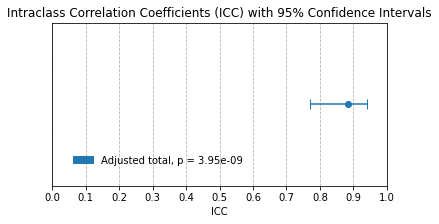

In [35]:
iccplt = ICCForest(dataframe=data_df, comparisons_dict=dict, ICC_Method='ICC3k', out_dir=out_dir, full_legend_patches=False).plot_icc_forest()